In [1]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report

In [2]:
%store -r data
%store -r data_test

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(11016, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   

In [4]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(2256, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       2256 non-null   int64         
 6   city_name                2256 non-null   object        
 7   tem

Drop columns with low correlation in relation to the label

In [5]:
data_xg   = data.copy()
data_xg_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h'] 
data_xg.drop(rem,axis=1,inplace=True)
data_xg_test.drop(rem ,axis=1,inplace=True)
nulls = True
if nulls:
    data_xg_test['temp']                = data_xg_test['temp'].fillna(0)
    data_xg_test['feels_like']          = data_xg_test['feels_like'].fillna(0)
    data_xg_test['temp_min']            = data_xg_test['temp_min'].fillna(0)
    data_xg_test['temp_max']            = data_xg_test['temp_max'].fillna(0)
    data_xg_test['humidity']            = data_xg_test['humidity'].fillna(0)
    data_xg_test['clouds_all']          = data_xg_test['clouds_all'].fillna(0)
    data_xg_test['weather_description'] = data_xg_test['weather_description'].fillna(0)

data_xg.info()
data_xg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   clouds_all               11016 non-null  int64  
 10  weather_description      11016 non-null  int64  
 11  Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data column

In [6]:
from sklearn.model_selection import train_test_split

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_xg.drop(['Injeção na rede (kWh)'],axis=1)
y = data_xg['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)

In [7]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 11). X_train has shape (8262, 11) while X_test has shape (2754, 11)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


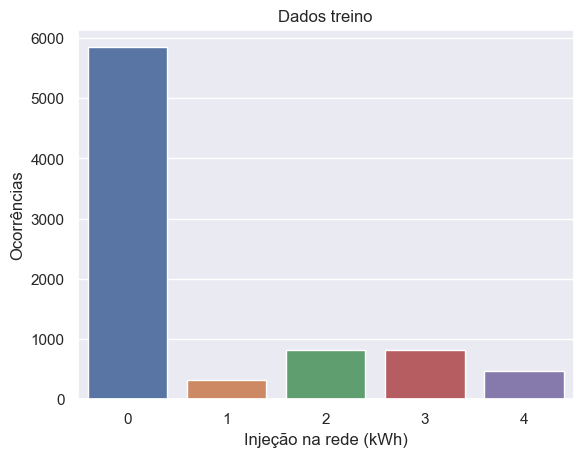

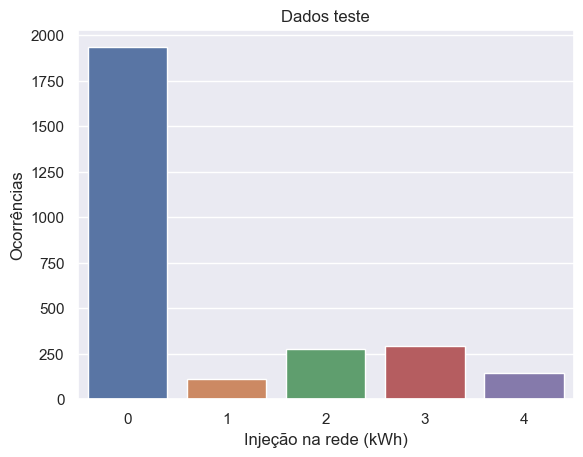

In [8]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

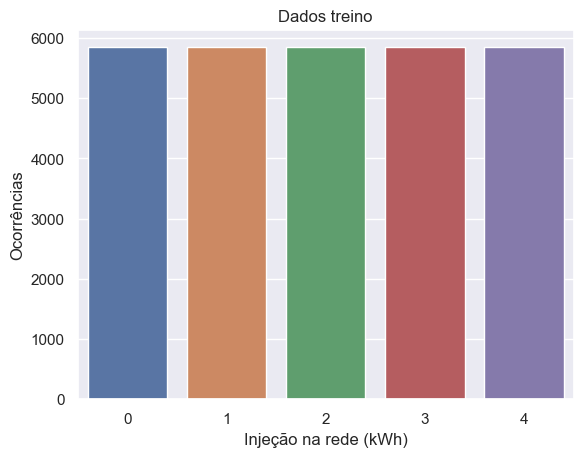

In [9]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

X_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=y_train.columns)

balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)
grafico_barras(y_resampled_df,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [1, 3, 5],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'min_child_weight': [1, 2, 3]
}

xgb_model = XGBClassifier(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)

grid_search.fit(X_resampled_df, y_resampled_df)

print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))


Best Parameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}
Best Accuracy: 91.52%


In [11]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)  

In [13]:
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

Test Accuracy: 84.02%


In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1933
           1       0.38      0.52      0.44       110
           2       0.53      0.50      0.51       276
           3       0.56      0.58      0.57       292
           4       0.57      0.67      0.62       143

    accuracy                           0.84      2754
   macro avg       0.61      0.65      0.62      2754
weighted avg       0.85      0.84      0.85      2754



In [15]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, accuracy_score
def stats_confusion_matrix(model,x_test,y_test):
    predictions = model.predict(x_test)
    print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))
    print(classification_report(y_test,predictions))
    ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    plt.show()

0.84 accuracy
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1933
           1       0.38      0.52      0.44       110
           2       0.53      0.50      0.51       276
           3       0.56      0.58      0.57       292
           4       0.57      0.67      0.62       143

    accuracy                           0.84      2754
   macro avg       0.61      0.65      0.62      2754
weighted avg       0.85      0.84      0.85      2754



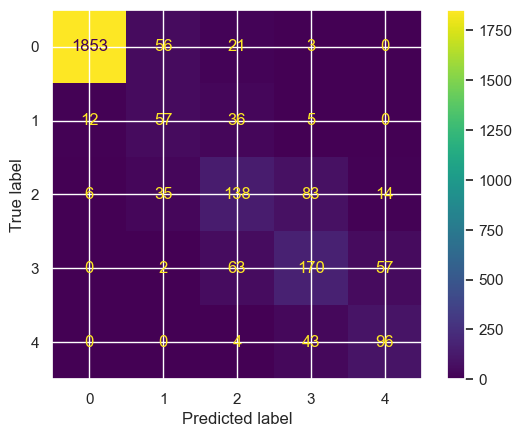

In [16]:
stats_confusion_matrix(best_model,X_test,y_test)

In [17]:
def gera_csv(predictions,name):
    row_ids = range(1, len(predictions) + 1)
    submission_df = pd.DataFrame({'RowId': row_ids, 'Result': predictions})
    replace_map = {'Result': {0:'None',1: 'Low', 2: 'Medium' ,3: 'High',4 : 'Very High' }}
    submission_df.replace(replace_map,inplace=True)
    submission_df.to_csv(name, index=False)

In [18]:
X_test_submission = data_xg_test.drop(['Injeção na rede (kWh)'],axis=1)
predictions_sub = best_model.predict(X_test_submission)
print(predictions_sub)

[0 0 0 ... 0 0 0]


In [19]:
gera_csv(predictions_sub,'group20_xgb_smote.csv')